In [251]:
%matplotlib inline 
from skimage import data, img_as_float
from skimage.color import rgb2hsv
from skimage.io import imread, imshow, show

import numpy as np
import matplotlib.pyplot as plt

In [252]:
def show_images(data, small=False, colormap=False):
    ldata = len(data)
    if small:
        fig = plt.figure(figsize=(20, 20))
    else:
        fig = plt.figure(figsize=(20, 10 * ldata))

    for i, (im, cmap) in enumerate(data, start=1):
        if small:
            ax = fig.add_subplot(1, ldata, i, xticks=[], yticks=[])
        else:
            ax = fig.add_subplot(ldata, 1, i, xticks=[], yticks=[])
        _img = ax.imshow(im, cmap=cmap)
        if colormap:
            plt.colorbar(_img, fraction=0.046, pad=0.04, shrink=1.0)
    if small:
        fig.show()

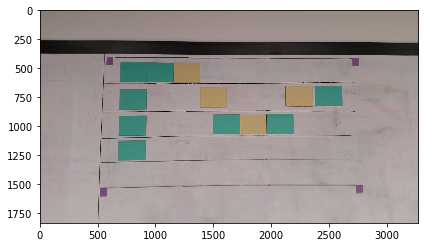

In [253]:
img = img_as_float(imread("b.jpg"))
imshow(img)
show()

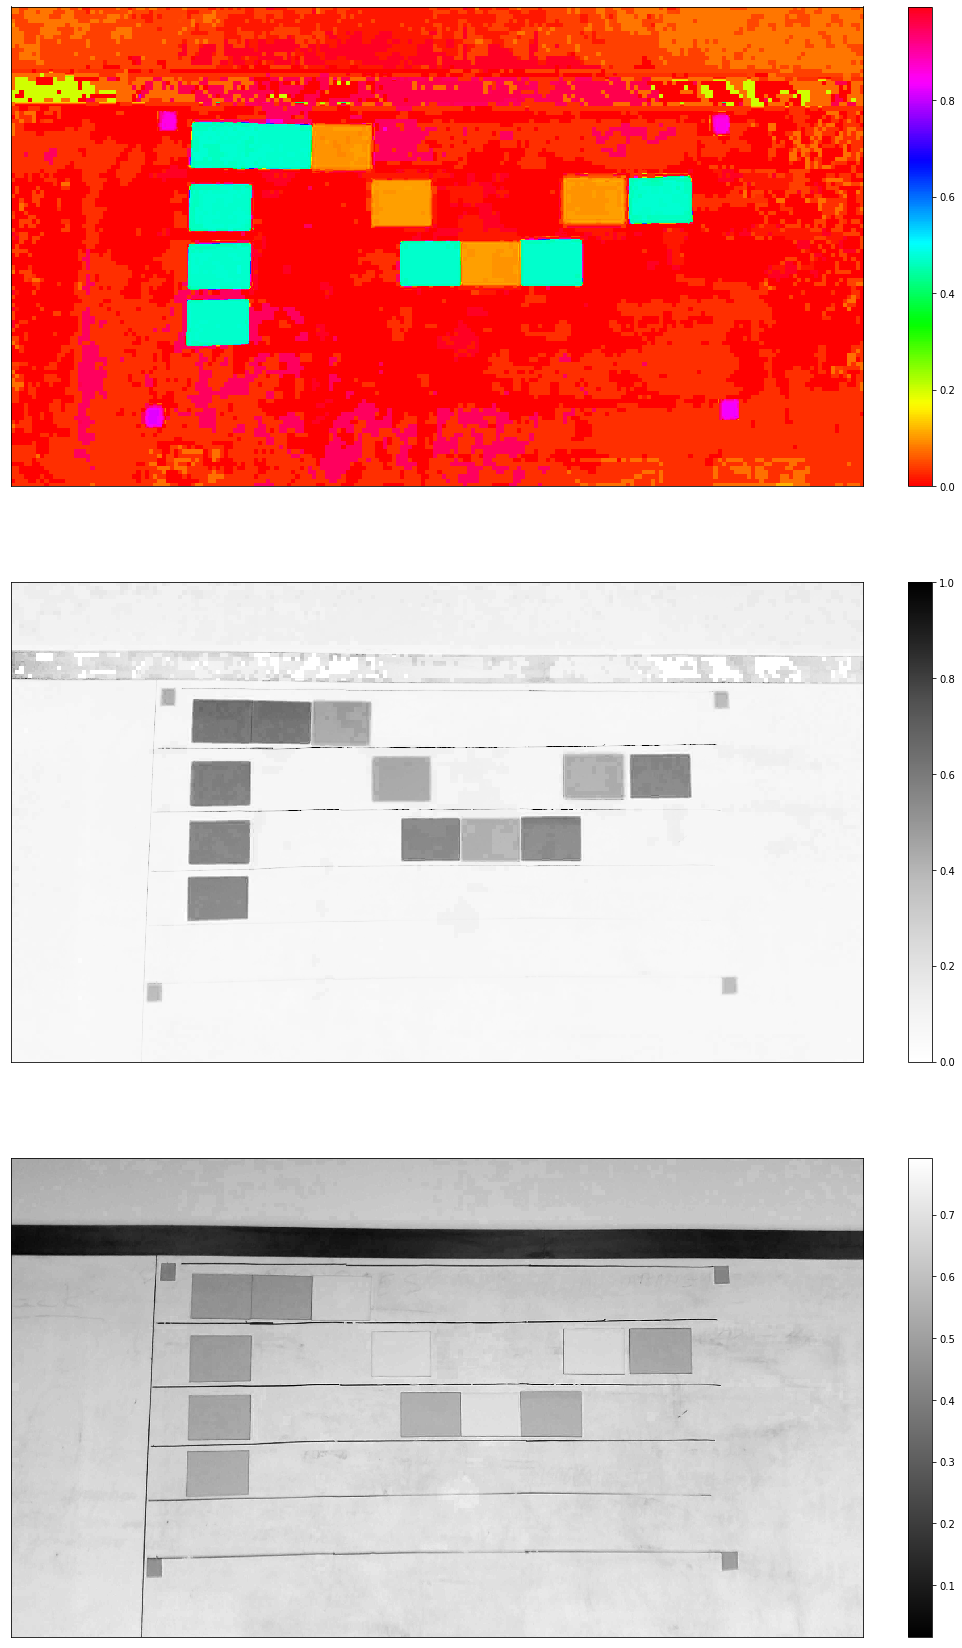

In [254]:
hsv = rgb2hsv(img)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

show_images([
    (h, 'hsv'),
    (s, 'Greys'),
    (v, 'gray'),
], colormap=True)

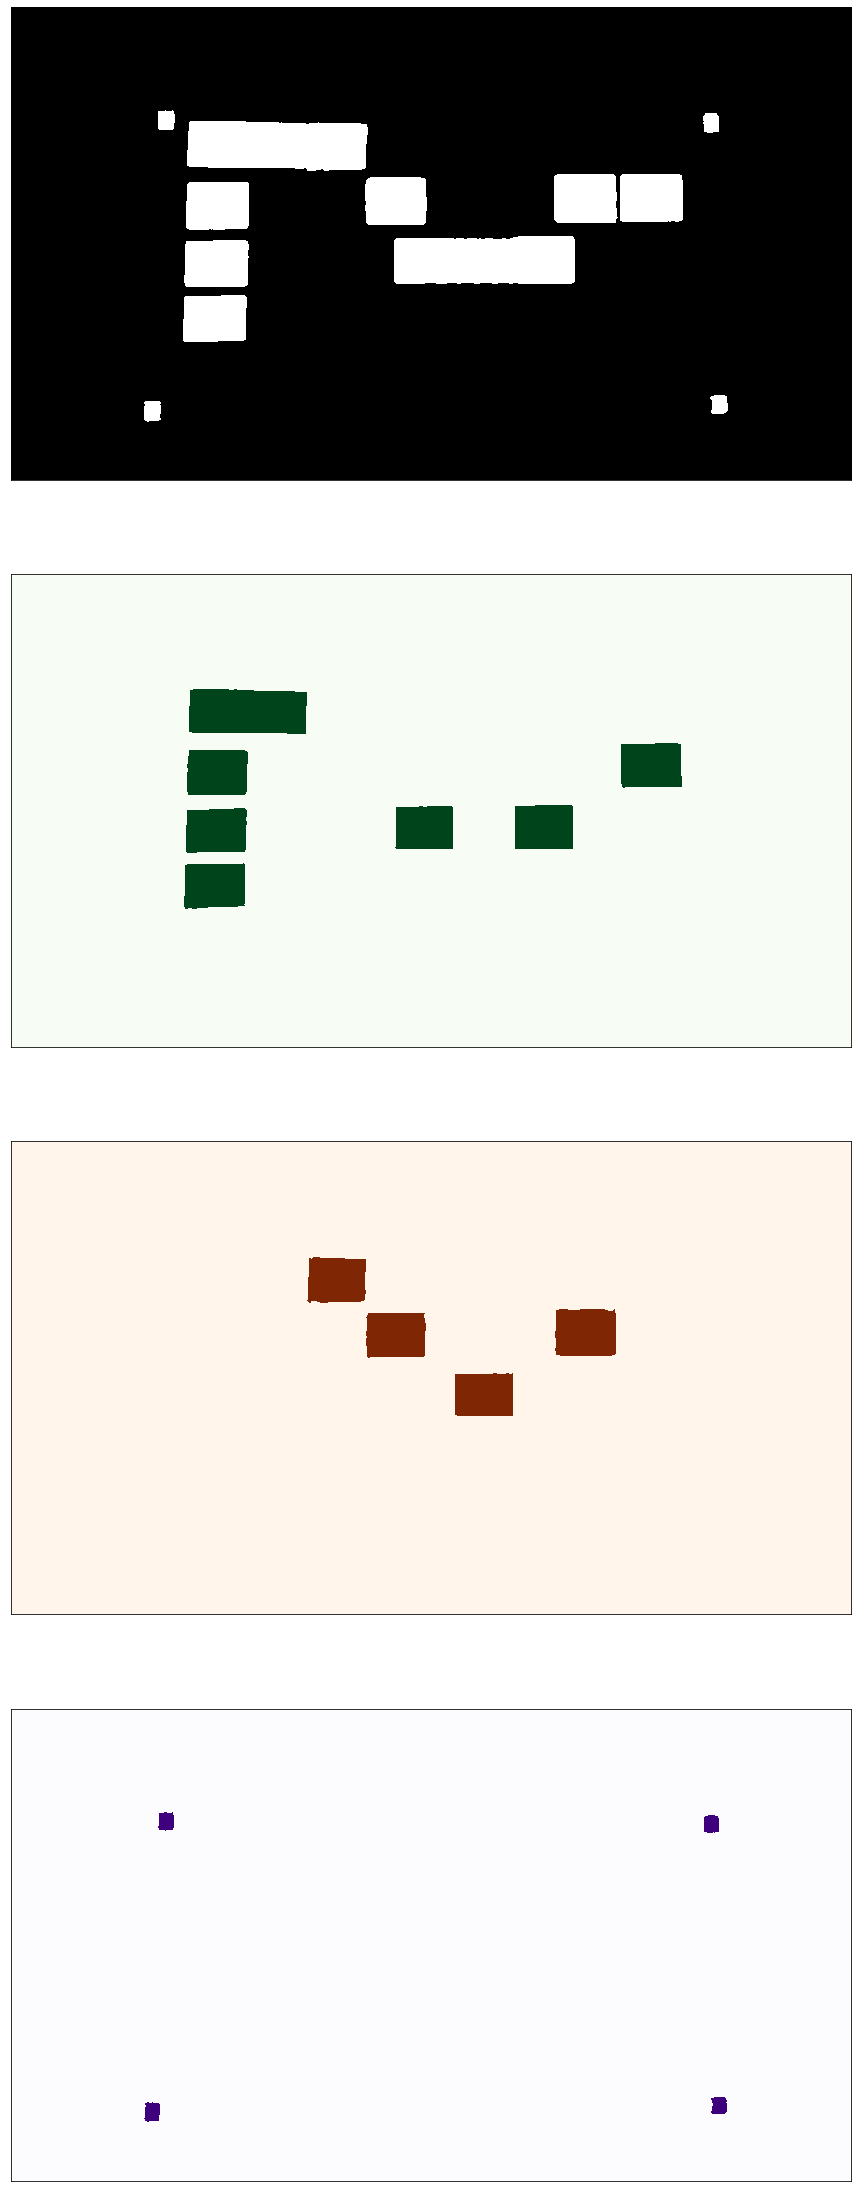

In [257]:
from skimage.color import label2rgb
from skimage.measure import label
from skimage.morphology import dilation, erosion, disk
import numpy as np

mini_selem = disk(3)
selem = disk(6)
land, lor = np.logical_and, np.logical_or

#lines = dilation(v < 0.4, selem)

blocks = land(s > 0.3, v > 0.3)
blocks = dilation(blocks, selem)

def rr(hstart, hend):
    x = land(blocks, land(h > hstart, h < hend))
    return erosion(x, mini_selem)
    
green_blocks = rr(0.4, 0.6)
yellow_blocks = rr(0.05, 0.2)
purple_blocks = rr(0.8, 0.95)

show_images([
    #(lines, 'gray'),
    (blocks, 'gray'),
    (green_blocks, 'Greens'),
    (yellow_blocks, 'Oranges'),
    (purple_blocks, 'Purples'),
])

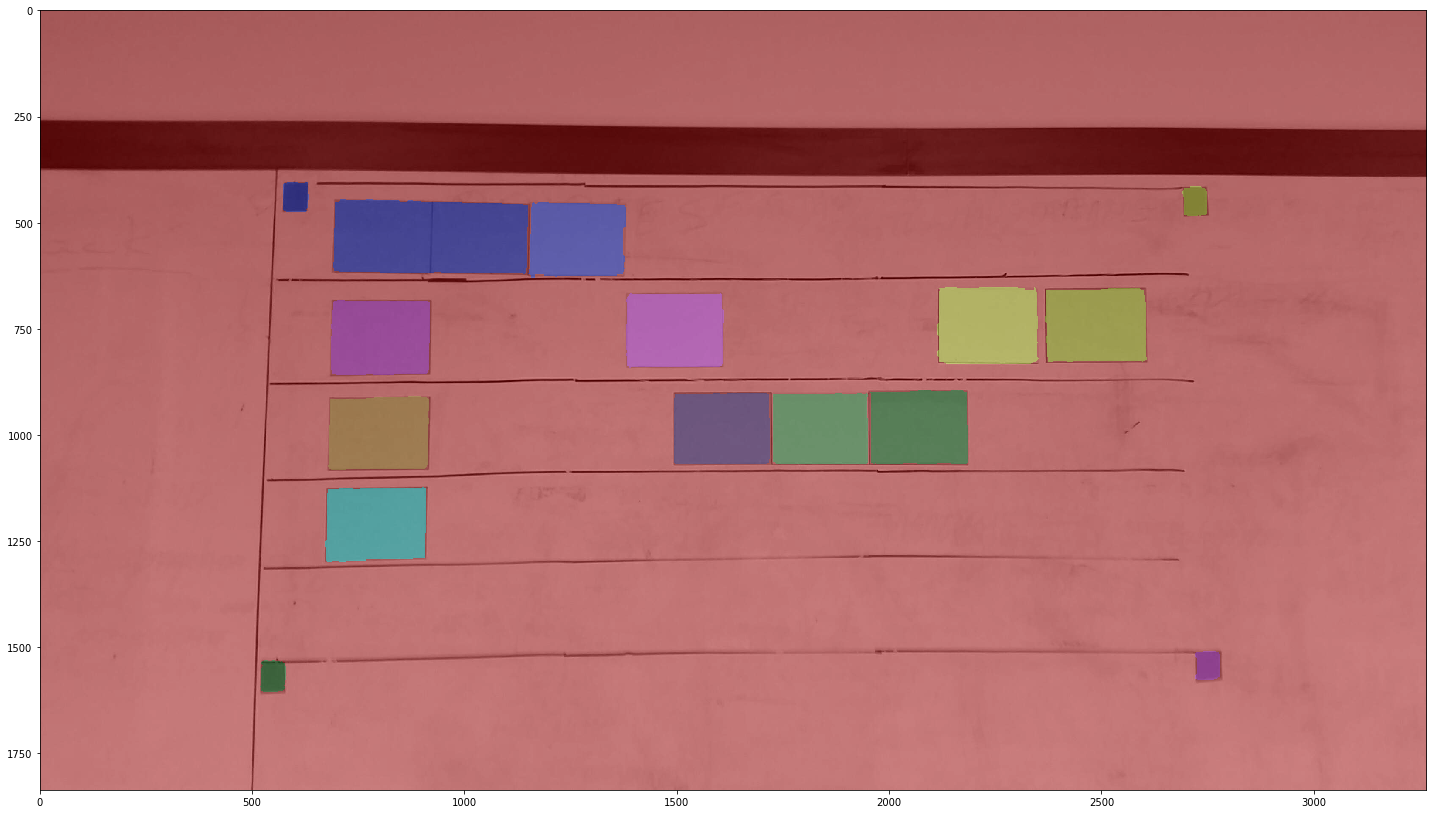

In [258]:
from skimage.color import label2rgb
from skimage.measure import label, regionprops

green_labels = label(green_blocks)
yellow_labels = label(yellow_blocks)
purple_labels = label(purple_blocks)
all_labels = green_labels + yellow_labels + purple_labels
image_label_overlay = label2rgb(all_labels, image=img)

fig = plt.figure(figsize=(20, 20))
imshow(image_label_overlay)

In [259]:
def show_labels(title, labels):
    print(title)
    for region in regionprops(labels):
        minr, minc, maxr, maxc = region.bbox
        medium_y = (minc + maxc) / 2.0
        start_x = minr
        length = maxr - minr
        print(f'* area: {region.area:8.2f}, y: {medium_y:8.2f}, start-x: {start_x:8.2f}, length: {length:8.2f}')
        
show_labels('GREEN', green_labels)
show_labels('YELLOW', yellow_labels)
show_labels('PURPLE', purple_labels)

GREEN
* area: 75737.00, y:   919.50, start-x:   446.00, length:   175.00
* area: 39619.00, y:  2485.50, start-x:   655.00, length:   174.00
* area: 39882.00, y:   801.00, start-x:   683.00, length:   175.00
* area: 38928.00, y:  2068.00, start-x:   895.00, length:   174.00
* area: 37094.00, y:  1604.00, start-x:   902.00, length:   167.00
* area: 39180.00, y:   796.50, start-x:   909.00, length:   173.00
* area: 39386.00, y:   790.00, start-x:  1123.00, length:   176.00
YELLOW
* area: 37632.00, y:  1263.50, start-x:   452.00, length:   178.00
* area: 41526.00, y:  2230.50, start-x:   653.00, length:   180.00
* area: 38967.00, y:  1494.00, start-x:   666.00, length:   178.00
* area: 36987.00, y:  1836.50, start-x:   901.00, length:   168.00
PURPLE
* area:  3963.00, y:   602.00, start-x:   404.00, length:    72.00
* area:  3694.00, y:  2717.50, start-x:   415.00, length:    71.00
* area:  3683.00, y:  2747.50, start-x:  1509.00, length:    68.00
* area:  4123.00, y:   548.50, start-x:  1

In [273]:
minx, miny = img.shape[0], img.shape[1]
maxx, maxy = 0, 0
for b in regionprops(purple_labels):
    b_minx, b_miny, b_maxx, b_maxy = region.bbox
    minx = min(minx, b_minx)
    miny = min(miny, b_miny)
    maxx = max(maxx, b_maxx)
    maxy = max(maxy, b_maxy)
    
print(minx, miny, maxx, maxy)
img_crop = img[minx:maxx, miny:maxy]
imshow(img_crop)
show()

1836 842 2176 848


ValueError: zero-size array to reduction operation minimum which has no identity